In [1]:
# pip install missingno

In [2]:
import pandas as pd
import os
import numpy as np
import missingno as msno

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [4]:
os.getcwd()

'D:\\jupyter\\01_Sangwoo_Project\\03_Project\\03_GyengnamTP\\03_Collecting_data'

In [5]:
os.listdir('D:/jupyter/01_Sangwoo_Project/03_Project/03_GyengnamTP/03_Collecting_data')

['.ipynb_checkpoints',
 '01_Electronic_current',
 '02_Vibration',
 'Collecting_data.ipynb',
 'Daeshin_parameter_220630.csv',
 'Daeshin_parameter_detail_220706.csv',
 'Daeshin_parameter_detail_220707.csv',
 'Daeshin_parameter_detail_220708.csv',
 'Daeshin_parameter_detail_220711.csv',
 'Daeshin_parameter_detail_220712.csv',
 'Database_data_EDA.ipynb',
 'Database_data_EDA_2(0712~).ipynb',
 'Electroni_current_220601_27.xls',
 'Untitled.ipynb',
 'Vibration_220601_27.xls',
 '공구교체이력_220712.xls']

In [6]:
df = pd.read_csv('Daeshin_parameter_detail_220712.csv')

C:\Users\jhpark\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3418: DtypeWarning: Columns (24) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6194860 entries, 0 to 6194859
Data columns (total 26 columns):
 #   Column           Dtype  
---  ------           -----  
 0   datetime         object 
 1   mc_id            int64  
 2   tool_number      float64
 3   shot_no          int64  
 4   item_id          float64
 5   work_type        int64  
 6   spindle_count    float64
 7   axes             float64
 8   current_x        float64
 9   current_z        float64
 10  current_spindle  int64  
 11  vibration        float64
 12  pos_x_1          float64
 13  pos_z_1          float64
 14  pos_x_2          float64
 15  pos_z_2          float64
 16  rpm              int64  
 17  feed             float64
 18  load_1           float64
 19  load_2           float64
 20  servo_load_x     float64
 21  servo_load_z     float64
 22  servo_current_x  float64
 23  servo_current_z  float64
 24  s_ITEM_Name      object 
 25  s_MC_No          object 
dtypes: float64(18), int64(5), object(3)
memory

In [8]:
df.head()

,datetime,mc_id,tool_number,shot_no,item_id,work_type,spindle_count,axes,current_x,current_z,current_spindle,vibration,pos_x_1,pos_z_1,pos_x_2,pos_z_2,rpm,feed,load_1,load_2,servo_load_x,servo_load_z,servo_current_x,servo_current_z,s_ITEM_Name,s_MC_No
0,2022-07-04 10:38:25.965127,25,101.0,14946,1151.0,0,1.0,2.0,NaN,NaN,2035,NaN,130193.0,250.0,NaN,NaN,309,62.0,2.0,NaN,13.0,55.0,13.0,-55.0,MD Retarder Housing,VL01
1,2022-07-04 10:38:26.408913,25,101.0,14946,1151.0,0,1.0,2.0,NaN,NaN,2037,NaN,131052.0,250.0,NaN,NaN,309,62.0,1.0,NaN,13.0,55.0,13.0,-55.0,MD Retarder Housing,VL01
2,2022-07-04 10:38:26.902217,25,101.0,14946,1151.0,0,1.0,2.0,NaN,NaN,2037,NaN,131976.0,250.0,NaN,NaN,309,62.0,1.0,NaN,13.0,56.0,13.0,-56.0,MD Retarder Housing,VL01
3,2022-07-04 10:38:27.397398,25,101.0,14946,1151.0,0,1.0,2.0,NaN,NaN,2035,NaN,133033.0,250.0,NaN,NaN,309,62.0,1.0,NaN,13.0,56.0,13.0,-56.0,MD Retarder Housing,VL01
4,2022-07-04 10:38:27.892503,25,101.0,14946,1151.0,0,1.0,2.0,NaN,NaN,2035,NaN,134024.0,250.0,NaN,NaN,309,62.0,1.0,NaN,13.0,56.0,13.0,-56.0,MD Retarder Housing,VL01


In [9]:
df.isnull().sum()

datetime                 0
mc_id                    0
tool_number        2111529
shot_no                  0
item_id            2331115
work_type                0
spindle_count      2111530
axes               2111529
current_x          6194860
current_z          6194860
current_spindle          0
vibration           195385
pos_x_1            2111529
pos_z_1            2111529
pos_x_2            5090970
pos_z_2            5090970
rpm                      0
feed               2111529
load_1             2111530
load_2             5090970
servo_load_x       2111530
servo_load_z       2111530
servo_current_x    2111530
servo_current_z    2111530
s_ITEM_Name        2331115
s_MC_No                  0
dtype: int64

# 데이터 정보

0. datetime : 날짜, 시간
1. mc_id : 설비 ID
2. tool_number : 공구 번호
3. shot_no : 샷 번호
4. item_id : item_id
5. work_type : 황삭, 정삭 (사용 x)
6. spindle_count : 스핀들 개수
7. axes : 축 개수
8. current_x : 전류값 - X
9. current_z : 전류값 - Z
10. current_spindle : 전류값-spindle
11. vibration : 진동값
12. pos_x_1 : 1번스핀들X축위치
13. pos_z_1 : 1번스핀들Z축위치
14. pos_x_2 : 2번스핀들X축위치
15. pos_z_2 : 2번스핀들Z축위치
16. rpm : rpm실제값
17. feed : feed실제값
18. load_1 : 1번스핀들로드미터
19. load_2 : 2번스핀들로드미터
20. servo_load_x : servo로드미터x축
21. servo_load_z : servo로드미터z축
22. servo_current_x : servo로드미터x축전류
23. servo_current_z : servo로드미터z축전류

In [10]:
df['s_MC_No'].value_counts()

VL09    2108542
VL01    1141488
VL04    1103890
VL14     980808
VL05     860132
Name: s_MC_No, dtype: int64

In [11]:
df_columns = list(df.columns)

for idx2 in df_columns:
    print('{}의 분포 값은'.format(idx2))
    print(df[idx2].value_counts())
    print(end = '\n\n')

datetime의 분포 값은
2022-07-04 10:38:25.965127    1
2022-07-10 14:04:41.407071    1
2022-07-10 14:04:42.444307    1
2022-07-10 14:04:42.344529    1
2022-07-10 14:04:42.240572    1
                             ..
2022-07-08 20:04:55.277124    1
2022-07-08 20:04:55.177184    1
2022-07-08 20:04:55.148290    1
2022-07-08 20:04:55.076994    1
2022-07-12 07:53:01.627870    1
Name: datetime, Length: 6194860, dtype: int64


mc_id의 분포 값은
10    2108542
25    1141488
22    1103890
21     980808
15     860132
Name: mc_id, dtype: int64


tool_number의 분포 값은
 101.0     1656281
 707.0      665364
 404.0      613992
 500.0      273042
 505.0      205123
 0.0        197909
 1111.0     163634
 909.0      120823
 303.0       60252
 1011.0      56891
 708.0       38137
 1010.0       9960
 700.0        8272
 400.0        4835
 1100.0       2570
 100.0        2291
 300.0        2178
 1000.0        943
 900.0         681
 799.0          41
 499.0          26
 199.0          24
 1099.0         16
 999.0          1

In [12]:
VL01_data = df[df['s_MC_No'] == 'VL01']
VL14_data = df[df['s_MC_No'] == 'VL14']
VL04_data = df[df['s_MC_No'] == 'VL04']
VL05_data = df[df['s_MC_No'] == 'VL05']
VL09_data = df[df['s_MC_No'] == 'VL09']

In [13]:
machine = [VL01_data, VL14_data, VL04_data, VL05_data, VL09_data]
machine_name = ['VL01_data, VL14_data, VL04_data, VL05_data, VL09_data']

In [14]:
def namestr(obj, namespace):
    return [name for name in namespace if namespace[name] is obj]

In [15]:
for machine_idx in machine:
    print(namestr(machine_idx, locals())[0])
    print(machine_idx['vibration'].value_counts())
    print("{} 설비의 진동 데이터 구간의 개수는 {}이다.".format(namestr(machine_idx, locals())[0], len(machine_idx['vibration'].value_counts())))
    print(end = '\n\n')

VL01_data
278.0    1059040
Name: vibration, dtype: int64
VL01_data 설비의 진동 데이터 구간의 개수는 1이다.


VL14_data
252.0    119678
251.0    112079
254.0     95572
253.0     89222
249.0     88042
255.0     79532
250.0     69013
248.0     68356
256.0     44650
257.0     35810
247.0     33845
246.0     33069
245.0     15262
258.0     13733
259.0     10551
244.0     10304
243.0      4665
260.0      4150
242.0      1939
261.0      1287
241.0      1199
262.0       748
240.0       546
263.0       411
239.0       232
264.0       175
265.0       159
238.0       152
266.0        96
267.0        62
237.0        43
268.0        35
270.0        21
269.0        18
271.0        14
273.0         5
272.0         5
236.0         4
274.0         2
Name: vibration, dtype: int64
VL14_data 설비의 진동 데이터 구간의 개수는 39이다.


VL04_data
204.0    118160
202.0    107874
205.0    106666
207.0     95539
203.0     89348
          ...  
331.0         1
383.0         1
182.0         1
324.0         1
293.0         1
Name: vibration, Len

In [16]:
for machine_idx2 in machine:
    print(namestr(machine_idx2, locals())[0])
    print(machine_idx2['current_spindle'].value_counts())
    print("{} 설비의 스핀들 데이터 구간의 개수는 {}이다.".format(namestr(machine_idx2, locals())[0], len(machine_idx2['current_spindle'].value_counts())))
    print(end = '\n\n')

VL01_data
0       472972
1049     32645
1048     31071
1050     30217
1047     25731
         ...  
5887         1
3807         1
5379         1
230          1
1860         1
Name: current_spindle, Length: 5105, dtype: int64
VL01_data 설비의 스핀들 데이터 구간의 개수는 5105이다.


VL14_data
0       471122
1038     12200
1039     12041
1035     12012
1036     11977
         ...  
6161         1
2990         1
4635         1
7440         1
386          1
Name: current_spindle, Length: 4159, dtype: int64
VL14_data 설비의 스핀들 데이터 구간의 개수는 4159이다.


VL04_data
0       250537
2018     47875
2019     45516
2017     44822
2020     39516
         ...  
5073         1
6568         1
4581         1
1576         1
5201         1
Name: current_spindle, Length: 5428, dtype: int64
VL04_data 설비의 스핀들 데이터 구간의 개수는 5428이다.


VL05_data
0       209399
1973     18568
1974     18090
1972     17654
1975     16833
         ...  
1163         1
4757         1
4743         1
6661         1
7923         1
Name: current_spindle, Length:

# 분포 현황 - MC(Machine) 정보

22/07/12 기준

1. VL01 (1,141,488개), 포카스 x_2, z_2, load2 값 없음, 진동값 1개(278)의 구간만 존재, 스핀들 5105개 구간 -> 진동값 1개 구간만 존재하여 제외
2. VL14 (980,808개), 포카스 x_2, z_2, load2 값 없음, 진동값 구간 39개, 스핀들 4159개 구간 -> 선택
3. VL04 (1,103,890개), 포카스 x_2, z_2, load2 값 존재, 진동값 구간 211개, 스핀들 5428개 구간이나 0값이 다수(250,537) -> spindle 2개로 제외
4. VL05 (741,649 개), 포카스 x_2, z_2, load2 값 없음, 진동값 구간 361개, 스핀들 9741개 구간이나 0값이 다수(209,399) -> 선택
5. VL09 (2,108,542 개), 포카스 x_2, z_2, load2 값 없음, 진동 27개 구간, 전류값 2420개이나 0값이 다수(1,628,850) -> 0값이 너무 많아서 제외

위 사항의 결과로 VL14, VL05 추가 탐색 필요

In [17]:
VL14_data.head(100)

,datetime,mc_id,tool_number,shot_no,item_id,work_type,spindle_count,axes,current_x,current_z,current_spindle,vibration,pos_x_1,pos_z_1,pos_x_2,pos_z_2,rpm,feed,load_1,load_2,servo_load_x,servo_load_z,servo_current_x,servo_current_z,s_ITEM_Name,s_MC_No
20577,2022-07-04 20:10:01.429035,21,404.0,28760,1164.0,0,1.0,2.0,NaN,NaN,2293,NaN,164998.0,150.0,NaN,NaN,300,60.0,5.0,NaN,18.0,56.0,18.0,-56.0,HD Retarder Housing,VL14
20579,2022-07-04 20:10:01.901199,21,404.0,28760,1164.0,0,1.0,2.0,NaN,NaN,2293,NaN,166021.0,150.0,NaN,NaN,300,60.0,5.0,NaN,18.0,56.0,18.0,-56.0,HD Retarder Housing,VL14
20581,2022-07-04 20:10:02.392943,21,404.0,28760,1164.0,0,1.0,2.0,NaN,NaN,2300,NaN,166981.0,150.0,NaN,NaN,300,60.0,5.0,NaN,19.0,56.0,19.0,-56.0,HD Retarder Housing,VL14
20583,2022-07-04 20:10:02.870584,21,404.0,28760,1164.0,0,1.0,2.0,NaN,NaN,2300,NaN,167941.0,150.0,NaN,NaN,300,60.0,5.0,NaN,18.0,56.0,18.0,-56.0,HD Retarder Housing,VL14
20585,2022-07-04 20:10:03.360869,21,404.0,28760,1164.0,0,1.0,2.0,NaN,NaN,2298,NaN,168900.0,150.0,NaN,NaN,300,60.0,5.0,NaN,19.0,57.0,19.0,-57.0,HD Retarder Housing,VL14
20587,2022-07-04 20:10:03.854283,21,404.0,28760,1164.0,0,1.0,2.0,NaN,NaN,2294,NaN,169860.0,150.0,NaN,NaN,300,60.0,5.0,NaN,18.0,56.0,18.0,-56.0,HD Retarder Housing,VL14
20589,2022-07-04 20:10:04.358786,21,404.0,28760,1164.0,0,1.0,2.0,NaN,NaN,2293,NaN,170883.0,150.0,NaN,NaN,300,60.0,5.0,NaN,19.0,56.0,19.0,-56.0,HD Retarder Housing,VL14
20590,2022-07-04 20:10:04.853117,21,404.0,28760,1164.0,0,1.0,2.0,NaN,NaN,2298,NaN,171907.0,150.0,NaN,NaN,300,60.0,5.0,NaN,19.0,56.0,19.0,-56.0,HD Retarder Housing,VL14
20592,2022-07-04 20:10:05.357876,21,404.0,28760,1164.0,0,1.0,2.0,NaN,NaN,2300,NaN,172866.0,150.0,NaN,NaN,300,60.0,5.0,NaN,19.0,56.0,19.0,-56.0,HD Retarder Housing,VL14
20594,2022-07-04 20:10:05.836561,21,404.0,28760,1164.0,0,1.0,2.0,NaN,NaN,2306,NaN,173890.0,150.0,NaN,NaN,300,60.0,5.0,NaN,19.0,56.0,19.0,-56.0,HD Retarder Housing,VL14


# 분포 확인 후 삭제컬럼

1. work_type : 황삭, 정삭에 대한 정보이며, 0(확삭) 값만 들어오고 있으며, 현재 사용하지 않음
2. current_x : 전류값 X 정보, 데이터 없음
3. current_z : 전류값 Z 정보, 데이터 없음

In [18]:
df.drop(['work_type', 'current_x', 'current_z'], axis = 1, inplace = True)

In [19]:
VL14_data = df[df['s_MC_No'] == 'VL14']
VL14_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 980808 entries, 20577 to 6194858
Data columns (total 23 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   datetime         980808 non-null  object 
 1   mc_id            980808 non-null  int64  
 2   tool_number      980808 non-null  float64
 3   shot_no          980808 non-null  int64  
 4   item_id          766857 non-null  float64
 5   spindle_count    980808 non-null  float64
 6   axes             980808 non-null  float64
 7   current_spindle  980808 non-null  int64  
 8   vibration        934686 non-null  float64
 9   pos_x_1          980808 non-null  float64
 10  pos_z_1          980808 non-null  float64
 11  pos_x_2          0 non-null       float64
 12  pos_z_2          0 non-null       float64
 13  rpm              980808 non-null  int64  
 14  feed             980808 non-null  float64
 15  load_1           980808 non-null  float64
 16  load_2           0 non-null      

In [20]:
VL14_data['item_id'].isnull().sum()

213951

In [21]:
VL14_data['item_id'].value_counts()

1164.0    766857
Name: item_id, dtype: int64

In [22]:
VL14_data['s_ITEM_Name'].value_counts()

HD Retarder Housing    766857
Name: s_ITEM_Name, dtype: int64

In [23]:
VL14_data['spindle_count'].value_counts()

1.0    980808
Name: spindle_count, dtype: int64

In [24]:
VL14_data['shot_no'].value_counts()

28983    107923
29006    101096
28954     33263
28934     32418
29052     27651
          ...  
29004         1
28988         1
28903         1
28970         1
28941         1
Name: shot_no, Length: 161, dtype: int64

In [25]:
columns = list(VL14_data.columns)

for idx in columns:
    print('{} 컬럼의 분포는'.format(idx))
    print(VL14_data[idx].value_counts(), end = '\n\n')
    print('{} 컬럼의 0값은 {}개 입니다.'.format(idx,len(VL14_data[VL14_data[idx] == 0])))
    print(end = '\n\n')

datetime 컬럼의 분포는
2022-07-04 20:10:01.429035    1
2022-07-10 12:12:53.094927    1
2022-07-10 12:12:47.327016    1
2022-07-10 12:12:47.771567    1
2022-07-10 12:12:48.214928    1
                             ..
2022-07-08 16:37:44.207043    1
2022-07-08 16:37:44.666815    1
2022-07-08 16:37:45.123320    1
2022-07-08 16:37:45.635123    1
2022-07-12 07:53:01.616833    1
Name: datetime, Length: 980808, dtype: int64

datetime 컬럼의 0값은 0개 입니다.


mc_id 컬럼의 분포는
21    980808
Name: mc_id, dtype: int64

mc_id 컬럼의 0값은 0개 입니다.


tool_number 컬럼의 분포는
404.0     480626
707.0     273752
101.0     156706
1011.0     56891
1010.0      9960
1000.0       943
100.0        741
700.0        725
400.0        420
1099.0        16
799.0         10
499.0         10
199.0          8
Name: tool_number, dtype: int64

tool_number 컬럼의 0값은 0개 입니다.


shot_no 컬럼의 분포는
28983    107923
29006    101096
28954     33263
28934     32418
29052     27651
          ...  
29004         1
28988         1
28903         1
28970         1


In [26]:
VL14_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 980808 entries, 20577 to 6194858
Data columns (total 23 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   datetime         980808 non-null  object 
 1   mc_id            980808 non-null  int64  
 2   tool_number      980808 non-null  float64
 3   shot_no          980808 non-null  int64  
 4   item_id          766857 non-null  float64
 5   spindle_count    980808 non-null  float64
 6   axes             980808 non-null  float64
 7   current_spindle  980808 non-null  int64  
 8   vibration        934686 non-null  float64
 9   pos_x_1          980808 non-null  float64
 10  pos_z_1          980808 non-null  float64
 11  pos_x_2          0 non-null       float64
 12  pos_z_2          0 non-null       float64
 13  rpm              980808 non-null  int64  
 14  feed             980808 non-null  float64
 15  load_1           980808 non-null  float64
 16  load_2           0 non-null      

# 분포 값 확인 후 삭제 컬럼 정보

총 데이터 정보 980,808개
1. mc_id : 21 값만 980,808개 존재
4. item_id : 1164 (766,857개)값만 존재 결측값 처리 필요 -> 보류
5. spindle_count : 1 값만 980,808개 존재(스핀들 2개)
6. axes : 2 값만 980,808개 존재
11. pos_x_2 : 값 없음
12. pos_z_2 : 값 없음
16. load_2 : 값 없음 
21. s_ITEM_Name : HD Retarder Housing 값만 766,857개 존재 -> HD Retarder Housing 값만 추출(정보 확인을 위해 보류)
22. s_MC_No : VL14 값만 980,808개 존재

In [27]:
VL14_data = VL14_data.reset_index()
VL14_data.drop(columns = ['index', 'mc_id', 'spindle_count', 'axes', 'pos_x_2', 'pos_z_2', 'load_2', 's_MC_No'], axis = 1, inplace = True)

<AxesSubplot:>

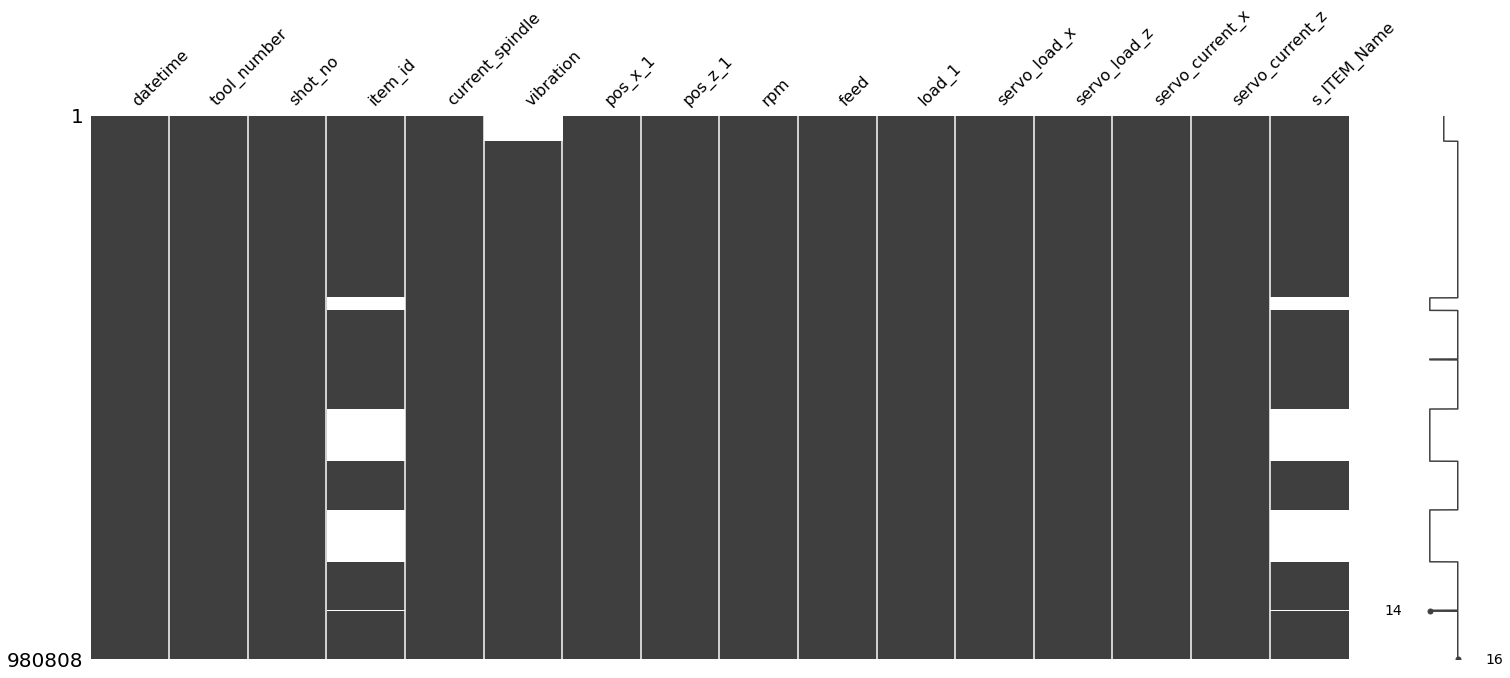

In [28]:
msno.matrix(VL14_data)

# 결측값 현황
1. item_id, vibration, s_ITEM_Name에 결측치가 존재
2. item_id와 s_ITEM_Name의 경우 결측치가 비슷한 패턴으로 나타남(item_id기준으로 s_ITEM_Name 제품명을 Join 하였기 때문에)
3. item_id와 s_ITEM_Name의 결측값의 전후의 값을 확인할 필요가 있음

In [29]:
VL14_data[VL14_data['s_ITEM_Name'].isnull()]

,datetime,tool_number,shot_no,item_id,current_spindle,vibration,pos_x_1,pos_z_1,rpm,feed,load_1,servo_load_x,servo_load_z,servo_current_x,servo_current_z,s_ITEM_Name
328726,2022-07-08 16:51:46.419169,404.0,28934,NaN,0,254.0,640000.0,250030.0,0,0.0,0.0,8.0,66.0,8.0,-66.0,NaN
328727,2022-07-08 16:51:46.931769,404.0,28934,NaN,0,256.0,640000.0,250030.0,0,0.0,0.0,8.0,67.0,8.0,-67.0,NaN
328728,2022-07-08 16:51:47.383285,404.0,28934,NaN,0,254.0,640000.0,250030.0,0,0.0,0.0,9.0,67.0,9.0,-67.0,NaN
328729,2022-07-08 16:51:47.834986,404.0,28934,NaN,0,253.0,640000.0,250030.0,0,0.0,0.0,8.0,67.0,8.0,-67.0,NaN
328730,2022-07-08 16:51:48.266931,404.0,28934,NaN,0,252.0,640000.0,250030.0,0,0.0,0.0,8.0,66.0,8.0,-66.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894101,2022-07-11 20:04:24.731932,404.0,29030,NaN,0,254.0,640000.0,250030.0,0,0.0,0.0,7.0,65.0,7.0,-65.0,NaN
894102,2022-07-11 20:04:25.216369,404.0,29030,NaN,0,255.0,640000.0,250030.0,0,0.0,0.0,7.0,66.0,7.0,-66.0,NaN
894103,2022-07-11 20:04:25.663010,404.0,29030,NaN,0,253.0,640000.0,250030.0,0,0.0,0.0,7.0,66.0,7.0,-66.0,NaN
894104,2022-07-11 20:04:26.120011,404.0,29030,NaN,0,255.0,640000.0,250030.0,0,0.0,0.0,7.0,66.0,7.0,-66.0,NaN


In [30]:
VL14_data.iloc[328726 : 351448]

,datetime,tool_number,shot_no,item_id,current_spindle,vibration,pos_x_1,pos_z_1,rpm,feed,load_1,servo_load_x,servo_load_z,servo_current_x,servo_current_z,s_ITEM_Name
328726,2022-07-08 16:51:46.419169,404.0,28934,NaN,0,254.0,640000.0,250030.0,0,0.0,0.0,8.0,66.0,8.0,-66.0,NaN
328727,2022-07-08 16:51:46.931769,404.0,28934,NaN,0,256.0,640000.0,250030.0,0,0.0,0.0,8.0,67.0,8.0,-67.0,NaN
328728,2022-07-08 16:51:47.383285,404.0,28934,NaN,0,254.0,640000.0,250030.0,0,0.0,0.0,9.0,67.0,9.0,-67.0,NaN
328729,2022-07-08 16:51:47.834986,404.0,28934,NaN,0,253.0,640000.0,250030.0,0,0.0,0.0,8.0,67.0,8.0,-67.0,NaN
328730,2022-07-08 16:51:48.266931,404.0,28934,NaN,0,252.0,640000.0,250030.0,0,0.0,0.0,8.0,66.0,8.0,-66.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
351443,2022-07-08 19:52:18.912530,1011.0,28934,NaN,1984,256.0,158882.0,-50479.0,130,13.0,1.0,0.0,52.0,0.0,-52.0,NaN
351444,2022-07-08 19:52:19.410692,1011.0,28934,1164.0,1988,257.0,158882.0,-50576.0,130,13.0,0.0,0.0,50.0,0.0,-50.0,HD Retarder Housing
351445,2022-07-08 19:52:19.920907,1011.0,28934,1164.0,1985,256.0,158882.0,-50686.0,130,13.0,1.0,0.0,50.0,0.0,-50.0,HD Retarder Housing
351446,2022-07-08 19:52:20.832715,1011.0,28934,1164.0,1985,258.0,158882.0,-50797.0,130,13.0,0.0,0.0,50.0,0.0,-50.0,HD Retarder Housing


index 351,443(2022-07-08 19:52:18.91253)까지 결측값이 나타나고 있음
그러나, 1초 차이인 index 351,444 이후로는 기존과 같은 1164 제품을 생산하고 있음
C-LIVE의 작업지시서를 확인해보면 HD Retarder Housing 제품 지시로 07-10까지 지속적으로 설정되어 있음
따라서, item_id와 s_ITEM_Name의 결측치는 1164로 결측치 대체 처리

In [31]:
VL14_data_mod1

NameError: name 'VL14_data_mod1' is not defined

In [ ]:
VL14_data_mod1 = VL14_data
VL14_data_mod1['item_id'] = VL14_data_mod1['item_id'].fillna(1164)
VL14_data_mod1['s_ITEM_Name'] = VL14_data_mod1['s_ITEM_Name'].fillna('HD Retarder Housing')
VL14_data_mod1.drop(columns = ['item_id', 's_ITEM_Name'], axis = 1, inplace = True)

In [ ]:
VL14_data_mod1['datetime'] = pd.to_datetime(VL14_data_mod1['datetime'])

In [ ]:
VL14_data_mod1

In [ ]:
VL14_data_mod1['tool_number'] = VL14_data_mod1['tool_number'].astype('str')
VL14_data_mod1['shot_no'] = VL14_data_mod1['shot_no'].astype('str')

In [ ]:
VL14_data_mod1.info()

In [ ]:
VL14_data_mod1['tool_number'].value_counts()

In [ ]:
VL14_data_mod1['tool_number'].unique()

In [ ]:
# 공구번호 추출 및 수정
current_list = list(VL14_data_mod1['tool_number'].unique())
ch_list = [4, 1, 1, 10, 10, 10, 7, 7 ,4, 1, 10 ,7, 4]
state = ['가동',	'취소',	'가동',	'취소',	'가동',	'가동',	'취소',	'가동',	'취소',	'종료',	'종료',	'종료','종료']
VL14_data_mod1['tool_number_mod'] = VL14_data_mod1['tool_number'].replace(current_list, ch_list)
VL14_data_mod1['state'] = VL14_data_mod1['tool_number'].replace(current_list, state)

In [ ]:
# VL04_data_mod1['current_spindle'] = VL04_data_mod1['current_spindle'].fillna(0)

In [ ]:
VL14_data_mod1

In [ ]:
VL14_data_mod1['tool_number'].value_counts()

VL14는 현재 4개의 공구를 활용하고 있음

1. 4번 공구(황삭): 404.0     480626, 400.0        420, 499.0         10
2. 7번 공구(정삭) : 707.0     273752, 700.0        725, 799.0         10
3. 10번 공구(정삭) : 1011.0     56891, 1010.0      9960, 1000.0       943, 1099.0        16
4. 1번 공구(정삭) : 101.0     156706, 100.0        741, 199.0          8

In [ ]:
VL14_data_mod1['tool_number_mod'].value_counts()

In [ ]:
VL14_data_mod2 = VL14_data_mod1.set_index('datetime')

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (20, 10))
plt.plot(VL14_data_mod2['current_spindle'])

In [ ]:
VL04_data_mod2.head(1000)

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (20, 10))

plt.plot(VL04_data_mod2[(VL04_data_mod2['tool_number_mod'] == 1)]['current_spindle'], label = 'Tool_1')
plt.plot(VL04_data_mod2[(VL04_data_mod2['tool_number_mod'] == 7)]['current_spindle'], label = 'Tool_7')
plt.plot(VL04_data_mod2[(VL04_data_mod2['tool_number_mod'] == 9)]['current_spindle'], label = 'Tool_9')
plt.plot(VL04_data_mod2[(VL04_data_mod2['tool_number_mod'] == 11)]['current_spindle'], label = 'Tool_11')
plt.plot(VL04_data_mod2[(VL04_data_mod2['tool_number_mod'] == 5)]['current_spindle'], label = 'Tool_5')
plt.plot(VL04_data_mod2[(VL04_data_mod2['tool_number_mod'] == 3)]['current_spindle'], label = 'Tool_3')
plt.legend()

In [ ]:
VL04_data_mod2[VL04_data_mod2['shot_no'] == '5583.0']['current_spindle'].plot()

In [ ]:
len(VL04_data['shot_no'].value_counts())

# shot 5583

1. Tool1(황삭) -> Tool5(황삭) -> Tool9(황삭) -> Tool7(정삭) = Tool11(정삭) = Tool3(정삭) 순으로 가공하고 있으며,
2. Tool7과 ,Tool3, Tool11이 동시간때 가공이 일어나고 있음, 즉, 정삭을 수행할 때, 공구가 동시에 발생하고 있음
3. Tool3은 Tool7, Tool11과 동시간 때 가공이 발생하고 있으나, 아주 일부만 발생

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (12, 10))

plt.plot(VL04_data_mod2[(VL04_data_mod2['shot_no'] == '5583.0') & (VL04_data_mod2['tool_number_mod'] == 1)]['current_spindle'], label = 'Tool_1')
plt.plot(VL04_data_mod2[(VL04_data_mod2['shot_no'] == '5583.0') & (VL04_data_mod2['tool_number_mod'] == 7)]['current_spindle'], label = 'Tool_7')
plt.plot(VL04_data_mod2[(VL04_data_mod2['shot_no'] == '5583.0') & (VL04_data_mod2['tool_number_mod'] == 9)]['current_spindle'], label = 'Tool_9')
plt.plot(VL04_data_mod2[(VL04_data_mod2['shot_no'] == '5583.0') & (VL04_data_mod2['tool_number_mod'] == 11)]['current_spindle'], label = 'Tool_11')
plt.plot(VL04_data_mod2[(VL04_data_mod2['shot_no'] == '5583.0') & (VL04_data_mod2['tool_number_mod'] == 5)]['current_spindle'], label = 'Tool_5')
plt.plot(VL04_data_mod2[(VL04_data_mod2['shot_no'] == '5583.0') & (VL04_data_mod2['tool_number_mod'] == 3)]['current_spindle'], label = 'Tool_3')
plt.legend()

In [ ]:
VL04_data_mod2['shot_no'].value_counts()

# shot 5607

1. Tool1(황삭) -> Tool5(황삭) -> Tool9(황삭) -> Tool7(정삭) = Tool11(정삭) = Tool3(정삭) 순으로 가공하고 있으며,
2. Tool7과 ,Tool3, Tool11이 동시간때 가공이 일어나고 있음, 즉, 정삭을 수행할 때, 공구가 동시에 발생하고 있음
3. Tool3은 Tool7, Tool11과 동시간 때 가공이 발생하고 있으나, 아주 일부만 발생

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (12, 10))

plt.plot(VL04_data_mod2[(VL04_data_mod2['shot_no'] == '5607.0') & (VL04_data_mod2['tool_number_mod'] == 1)]['current_spindle'], label = 'Tool_1')
plt.plot(VL04_data_mod2[(VL04_data_mod2['shot_no'] == '5607.0') & (VL04_data_mod2['tool_number_mod'] == 7)]['current_spindle'], label = 'Tool_7')
plt.plot(VL04_data_mod2[(VL04_data_mod2['shot_no'] == '5607.0') & (VL04_data_mod2['tool_number_mod'] == 9)]['current_spindle'], label = 'Tool_9')
plt.plot(VL04_data_mod2[(VL04_data_mod2['shot_no'] == '5607.0') & (VL04_data_mod2['tool_number_mod'] == 11)]['current_spindle'], label = 'Tool_11')
plt.plot(VL04_data_mod2[(VL04_data_mod2['shot_no'] == '5607.0') & (VL04_data_mod2['tool_number_mod'] == 5)]['current_spindle'], label = 'Tool_5')
plt.plot(VL04_data_mod2[(VL04_data_mod2['shot_no'] == '5607.0') & (VL04_data_mod2['tool_number_mod'] == 3)]['current_spindle'], label = 'Tool_3')
plt.legend()

# shot 5588

1. Tool1(황삭) -> Tool5(황삭) -> Tool9(황삭) -> Tool7(정삭) = Tool11(정삭) = Tool3(정삭) 순으로 가공하고 있으며,
2. Tool7과 ,Tool3, Tool11이 동시간때 가공이 일어나고 있음, 즉, 정삭을 수행할 때, 공구가 동시에 발생하고 있음
3. Tool3은 Tool7, Tool11과 동시간 때 가공이 발생하고 있으나, 아주 일부만 발생

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (12, 10))

plt.plot(VL04_data_mod2[(VL04_data_mod2['shot_no'] == '5588.0') & (VL04_data_mod2['tool_number_mod'] == 1)]['current_spindle'], label = 'Tool_1')
plt.plot(VL04_data_mod2[(VL04_data_mod2['shot_no'] == '5588.0') & (VL04_data_mod2['tool_number_mod'] == 7)]['current_spindle'], label = 'Tool_7')
plt.plot(VL04_data_mod2[(VL04_data_mod2['shot_no'] == '5588.0') & (VL04_data_mod2['tool_number_mod'] == 9)]['current_spindle'], label = 'Tool_9')
plt.plot(VL04_data_mod2[(VL04_data_mod2['shot_no'] == '5588.0') & (VL04_data_mod2['tool_number_mod'] == 11)]['current_spindle'], label = 'Tool_11')
plt.plot(VL04_data_mod2[(VL04_data_mod2['shot_no'] == '5588.0') & (VL04_data_mod2['tool_number_mod'] == 5)]['current_spindle'], label = 'Tool_5')
plt.plot(VL04_data_mod2[(VL04_data_mod2['shot_no'] == '5588.0') & (VL04_data_mod2['tool_number_mod'] == 3)]['current_spindle'], label = 'Tool_3')
plt.legend()

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (12, 10))

plt.plot(VL04_data_mod2[(VL04_data_mod2['shot_no'] == '5593.0') & (VL04_data_mod2['tool_number_mod'] == 1)]['current_spindle'], label = 'Tool_1')
plt.plot(VL04_data_mod2[(VL04_data_mod2['shot_no'] == '5593.0') & (VL04_data_mod2['tool_number_mod'] == 7)]['current_spindle'], label = 'Tool_7')
plt.plot(VL04_data_mod2[(VL04_data_mod2['shot_no'] == '5593.0') & (VL04_data_mod2['tool_number_mod'] == 9)]['current_spindle'], label = 'Tool_9')
plt.plot(VL04_data_mod2[(VL04_data_mod2['shot_no'] == '5593.0') & (VL04_data_mod2['tool_number_mod'] == 11)]['current_spindle'], label = 'Tool_11')
plt.plot(VL04_data_mod2[(VL04_data_mod2['shot_no'] == '5593.0') & (VL04_data_mod2['tool_number_mod'] == 5)]['current_spindle'], label = 'Tool_5')
plt.plot(VL04_data_mod2[(VL04_data_mod2['shot_no'] == '5593.0') & (VL04_data_mod2['tool_number_mod'] == 3)]['current_spindle'], label = 'Tool_3')
plt.legend()

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (12, 10))

plt.plot(VL04_data_mod2[(VL04_data_mod2['shot_no'] == '5607.0') & (VL04_data_mod2['tool_number_mod'] == 1)]['current_spindle'], label = 'Tool_1')
plt.plot(VL04_data_mod2[(VL04_data_mod2['shot_no'] == '5607.0') & (VL04_data_mod2['tool_number_mod'] == 7)]['current_spindle'], label = 'Tool_7')
plt.plot(VL04_data_mod2[(VL04_data_mod2['shot_no'] == '5607.0') & (VL04_data_mod2['tool_number_mod'] == 9)]['current_spindle'], label = 'Tool_9')
plt.plot(VL04_data_mod2[(VL04_data_mod2['shot_no'] == '5607.0') & (VL04_data_mod2['tool_number_mod'] == 11)]['current_spindle'], label = 'Tool_11')
plt.plot(VL04_data_mod2[(VL04_data_mod2['shot_no'] == '5607.0') & (VL04_data_mod2['tool_number_mod'] == 5)]['current_spindle'], label = 'Tool_5')
plt.plot(VL04_data_mod2[(VL04_data_mod2['shot_no'] == '5607.0') & (VL04_data_mod2['tool_number_mod'] == 3)]['current_spindle'], label = 'Tool_3')
plt.legend()

In [ ]:
VL04_data_mod1

In [ ]:
import datetime
VL04_data_mod1['date'] = VL04_data_mod1['datetime'].dt.date
VL04_data_mod1['hour'] = VL04_data_mod1['datetime'].dt.hour
VL04_data_mod1['minute'] = VL04_data_mod1['datetime'].dt.minute
VL04_data_mod1['second'] = VL04_data_mod1['datetime'].dt.second

In [ ]:
VL04_data_mod2 = VL04_data_mod1.groupby(['date', 'tool_number', 'hour', 'minute', 'second', 's_ITEM_Name', 'tool_number_mod', 'state']).mean()
VL04_data_mod2 = VL04_data_mod2.reset_index()
VL04_data_mod2['datetime'] = VL04_data_mod2['date'].astype(str) + ' ' + VL04_data_mod2['hour'].astype(str) + ':' + VL04_data_mod2['minute'].astype(str) + ':' + VL04_data_mod2['second'].astype(str)
VL04_data_mod2['datetime'] = pd.to_datetime(VL04_data_mod2['datetime'])

In [ ]:
VL04_data_mod2.info()

In [ ]:
# VL04_data_mod2['date'] = pd.to_datetime(VL04_data_mod2['date'], format = '%Y%m%d')
VL04_data_mod2.sort_values(by = 'date')
VL04_data_mod2['current_spindle'].plot()

In [ ]:
VL04_data_mod2_spindle = VL04_data_mod1[['datetime','current_spindle']]
# VL04_data_mod2_spindle = VL04_data_mod2_spindle.current_spindle.values
# VL04_data_mod2_spindle_log = np.log10(VL04_data_mod2_spindle)
# VL04_data_mod2_spindle_log

In [ ]:
VL04_data_mod2_spindle

In [ ]:
Hour = VL04_data_mod2_spindle.set_index('datetime').resample('H').mean()
plt.plot(Hour)
plt.title('Hour')
plt.xticks(rotation = 90)

In [ ]:
Minute = VL04_data_mod2_spindle.set_index('datetime').resample('T').mean()
plt.plot(Minute)
plt.title('Minute')
plt.xticks(rotation = 90)

In [ ]:
Second = VL04_data_mod2_spindle.set_index('datetime').resample('S').mean()
plt.plot(Second)
plt.title('Second')
plt.xticks(rotation = 90)

# Feature engineering

In [ ]:
import datetime

spindle_hour = VL04_data_mod2_spindle.set_index('datetime').resample('H').mean().reset_index()
spindle_minute = VL04_data_mod2_spindle.set_index('datetime').resample('T').mean().reset_index()
spindle_second = VL04_data_mod2_spindle.set_index('datetime').resample('S').mean().reset_index()

In [ ]:
for DataFrame in [spindle_hour, spindle_minute, spindle_second]:
    DataFrame['Weekday'] = pd.Categorical(DataFrame['datetime'].dt.strftime('%A'), categories = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday'])
    DataFrame['Hour'] = DataFrame['datetime'].dt.hour
    DataFrame['Minute'] = DataFrame['datetime'].dt.minute
    DataFrame['Second'] = DataFrame['datetime'].dt.second
    DataFrame['Month'] = DataFrame['datetime'].dt.month
    DataFrame['Month_day'] = DataFrame['datetime'].dt.day
    DataFrame['Lag'] = DataFrame['current_spindle'].shift(1)
    DataFrame['Rolling_Mean'] = DataFrame['current_spindle'].rolling(7).mean()

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,7), dpi= 80)
sns.distplot(VL04_data_mod2_spindle['current_spindle'], label = 'current spindle')

In [ ]:
plt.figure(figsize = (20,10))
by_weekday = spindle_hour.groupby(['Hour', 'Weekday']).mean()['current_spindle'].unstack()
sns.distplot(by_weekday['Monday'], label = 'Monday')
sns.distplot(by_weekday['Tuesday'], label = 'Tuesday')
sns.distplot(by_weekday['Wednesday'], label = 'Wednesday')
sns.distplot(by_weekday['Thursday'], label = 'Thursday')
sns.distplot(by_weekday['Friday'], label = 'Friday')
sns.distplot(by_weekday['Saturday'], label = 'Saturday')
sns.distplot(by_weekday['Sunday'], label = 'Sunday')
plt.xlabel('current spindle')
plt.legend()

In [ ]:
sns.countplot(data = by_weekday)
plt.xticks(rotation = 90)

작업이 월요일, 화요일에만 이루어지고 있음

In [ ]:
spindle_hour

In [ ]:
spindle_hour[['current_spindle', 'Hour']].groupby('Hour').mean().plot()

In [ ]:
by_weekday.plot()

In [ ]:
spindle_hour

In [ ]:
spindle_hour = spindle_hour.join(spindle_hour.groupby(['Hour','Weekday'])['current_spindle'].mean() ,on = ['Hour', 'Weekday'], rsuffix='_Average')
spindle_second = spindle_second.join(spindle_second.groupby(['Second','Weekday'])['current_spindle'].mean() ,on = ['Second', 'Weekday'], rsuffix='_Average')
spindle_hour.head()

In [ ]:
spindle_hour = spindle_hour.dropna()
spindle_minute = spindle_minute.dropna()
spindle_second = spindle_second.dropna()

In [ ]:
spindle_second.head()

In [ ]:
spindle_second.head()

In [ ]:
spindle_model_second_data = spindle_second[['current_spindle', 'Hour', 'Minute', 'Second', 'Month', 'Month_day', 'Lag', 'Rolling_Mean']].dropna()
spindle_model_minute_data = spindle_minute[['current_spindle', 'Hour', 'Minute', 'Second', 'Month', 'Month_day', 'Lag', 'Rolling_Mean']]
spindle_model_second_data.head()

Isolation Forest를 활용한 이상탐지 수행

In [ ]:
from sklearn.ensemble import IsolationForest

IF = IsolationForest(random_state = 42, contamination = 0.005, n_estimators = 200, max_samples = 0.7)
IF.fit(spindle_model_second_data)

In [ ]:
spindle_second['Outliers'] = pd.Series(IF.predict(spindle_model_second_data)).apply(lambda x: 1 if x == -1 else 0)
score = IF.decision_function(spindle_model_second_data)

spindle_second['Score'] = score
spindle_second.head()

In [ ]:
def outliers(thresh):
    print(f'Number of Outliers below Anomaly Score Threshold {thresh}:')
    print(len(spindle_second.query(f"Outliers == 1 & Score <= {thresh}")))

In [ ]:
sns.lineplot(data = spindle_second.set_index('datetime')['current_spindle'])
sns.scatterplot(data = spindle_second.set_index('datetime').query("Outliers == 1")['current_spindle'], color = 'red')
plt.xticks(rotation = 90)

In [ ]:
VL04_data_mod2['datetime2'] = VL04_data_mod2['datetime']
VL04_data_mod3 = VL04_data_mod2.set_index('datetime')

In [ ]:
VL04_data_mod3['date'] = pd.to_datetime(VL04_data_mod3['date'])

In [ ]:
VL04_data_mod3_period = VL04_data_mod3[VL04_data_mod3['date'] < '2022-06-30']

X bar의 평균치 3 시그마 관리한계선

UCL(Upper Control Limit) or LCL = 평균 +- 표준편차(시그마/루트n) A = 3/루트n

In [ ]:
VL04_data_mod3['current_spindle'].std() * 3 / len(VL04_data_mod3['current_spindle']) ** (1/2)

In [ ]:
# x bar- R 관리도 생성

# X bar와 R 생성
VL04_data_mod3_period['current_spindle_mean'] = VL04_data_mod3_period['current_spindle'].mean()
VL04_data_mod3_period['current_spindle_R'] = VL04_data_mod3_period['current_spindle'].max() - VL04_data_mod3_period['current_spindle'].min() 
VL04_data_mod3_period['UCL'] = VL04_data_mod3_period['current_spindle_mean'] + 3 * VL04_data_mod3_period['current_spindle'].std()
VL04_data_mod3_period['LCL'] = VL04_data_mod3_period['current_spindle_mean'] - 3 * VL04_data_mod3_period['current_spindle'].std()


In [ ]:
import statistics


fig = plt.figure(figsize = (15,15))

# x bar chart
plt.plot(VL04_data_mod3_period['current_spindle_mean'], label = 'X bar', color = 'blue')
plt.plot(VL04_data_mod3_period['UCL'], label = 'Upper Control Limit', color = 'red')
plt.plot(VL04_data_mod3_period['LCL'], label = 'Lower Control Limit', color = 'red')
plt.plot(VL04_data_mod3_period['current_spindle'], label = 'spindle', color = 'green')
plt.legend()


In [ ]:
# from pyspc import *
# a = spc(VL04_data_mod3_6day['current_spindle']) + ewma()
# print(a)

In [ ]:
Tool_1 = VL04_data_mod3[VL04_data_mod3['tool_number_mod']==1]
Tool_7 = VL04_data_mod3[VL04_data_mod3['tool_number_mod']==7]
Tool_9 = VL04_data_mod3[VL04_data_mod3['tool_number_mod']==9]
Tool_5 = VL04_data_mod3[VL04_data_mod3['tool_number_mod']==5]
Tool_3 = VL04_data_mod3[VL04_data_mod3['tool_number_mod']==3]
Tool_11 = VL04_data_mod3[VL04_data_mod3['tool_number_mod']==11]
Tool_1 = Tool_1.sort_values(['datetime2'])
Tool_7 = Tool_7.sort_values(['datetime2'])
Tool_9 = Tool_9.sort_values(['datetime2'])
Tool_5 = Tool_5.sort_values(['datetime2'])
Tool_3 = Tool_3.sort_values(['datetime2'])

In [ ]:
Tool_11

In [ ]:
plt.figure(figsize = (20,10))
plt.plot(Tool_9['current_spindle'])

In [ ]:
plt.figure(figsize = (20,10))
plt.plot(Tool_9[(Tool_9['datetime2'] > '2022-06-27 05:52:08') & (Tool_9['datetime2'] < '2022-06-28 00:00:00')]['current_spindle'])

In [ ]:
Tool_9[(Tool_9['datetime2'] > '2022-06-27 05:52:08') & (Tool_9['datetime2'] < '2022-06-28 00:00:00')]['current_spindle'].tail(1000)

In [ ]:
# x bar- R 관리도 생성

# X bar와 R 생성
Tool_1['current_spindle_mean'] = Tool_1['current_spindle'].mean()
Tool_1['current_spindle_R'] = Tool_1['current_spindle'].max() - Tool_1['current_spindle'].min() 
Tool_1['UCL'] = Tool_1['current_spindle_mean'] + 3 * Tool_1['current_spindle'].std()
Tool_1['LCL'] = Tool_1['current_spindle_mean'] - 3 * Tool_1['current_spindle'].std()

In [ ]:
Tool_1['state'].value_counts()

In [ ]:
VL04_data_mod3.sort_values(by = 'datetime', inplace = True)

In [ ]:
VL04_data_mod3

In [ ]:
VL04_data_mod3[(VL04_data_mod3['date'] == '2022-06-28') & (VL04_data_mod3['tool_number_mod'] == 9)].tail(100)

In [ ]:
VL04_data_mod3[(VL04_data_mod3['date'] == '2022-06-27') & (VL04_data_mod3['tool_number_mod'] == 11)]['current_spindle'].head(20)

In [ ]:
VL04_data_mod3[(VL04_data_mod3['date'] == '2022-06-27') & (VL04_data_mod3['tool_number_mod'] == 7)]['current_spindle'].head(20)

In [ ]:
# Tool별 current_spindle 시각화
machine_stop = VL04_data_mod3[VL04_data_mod3['state']=='종료']

Tool = [Tool_1, Tool_7, Tool_9, Tool_11, Tool_5, Tool_3]
Tool_list_name = ['Tool_1', 'Tool_7', 'Tool_9', 'Tool_11', 'Tool_5', 'Tool_3']
for idx in range(len(Tool)):
    sns.set_context('talk')
    plt.figure(figsize=(18,3))
    plt.plot(Tool[idx]['current_spindle'], color='grey')
    plt.plot(Tool[idx][Tool[idx]['state'] == '종료']['current_spindle'], linestyle='none', marker='X', color='red', markersize=5)
    plt.title(Tool_list_name[idx])
plt.show()

In [ ]:
# Tool_list = [Tool_1, Tool_7, Tool_9, Tool_5, Tool_3]
# Tool_list_name = ['Tool_1', 'Tool_7', 'Tool_9', 'Tool_5', 'Tool_3']

# fig = plt.figure(figsize = (20, 12))

# for ax_idx in range(1, len(Tool_list)):
#     globals()['ax_{}'.format(ax_idx)] = fig.add_subplot(len(Tool_list), 1, ax_idx+1)
#     globals()['ax_{}'.format(ax_idx)].plot(Tool_list[ax_idx-1]['current_spindle'], label = Tool_list_name[ax_idx])
#     for idx in Tool_list[ax_idx-1][Tool_list[ax_idx-1]['state'] == '일시정지'].index.values:
#         globals()['ax_{}'.format(ax_idx)].axvline(idx, ymin = 0.5, ymax = 0.6, c = 'orange', linewidth = 1)
#     for idx2 in Tool_list[ax_idx-1][Tool_list[ax_idx-1]['state'] == '종료'].index.values:
#         globals()['ax_{}'.format(ax_idx)].axvline(idx2, ymin = 0.5, ymax = 0.6, c = 'red', linewidth = 1)
# fig.tight_layout()
# fig.show()

In [ ]:
# Tool_7_mod = Tool_7[(Tool_7['date'] < '2022-06-30') & (Tool_7['date'] > '2022-06-27')] 
Tool_7_mod = Tool_7[(Tool_7['date'] > '2022-07-04') & (Tool_7['date'] < '2022-07-06')] 

In [ ]:
Tool_7_mod[Tool_7_mod['state'] == '일시정지']

In [ ]:
stop = Tool_7_mod[Tool_7_mod['state'] == '일시정지']
end = Tool_7_mod[Tool_7_mod['state'] == '종료']

plt.figure(figsize = (10,5))
plt.plot(Tool_7_mod['current_spindle'], label = 'spindle')
plt.plot(stop['current_spindle'], linestyle = 'none', marker = 'o', color = 'orange')
plt.plot(end['current_spindle'], linestyle = 'none', marker = 'X', color = 'red')
plt.xticks(rotation = 90)
plt.legend()

In [ ]:
# x bar- R 관리도 생성

# X bar와 R 생성
Tool_7['current_spindle_mean'] = Tool_7['current_spindle'].mean()
Tool_7['current_spindle_R'] = Tool_7['current_spindle'].max() - Tool_7['current_spindle'].min() 
Tool_7['UCL'] = Tool_7['current_spindle_mean'] + 3 * Tool_7['current_spindle'].std()
Tool_7['LCL'] = Tool_7['current_spindle_mean'] - 3 * Tool_7['current_spindle'].std()
Tool_7['X_bar_anomaly'] = ((Tool_7['current_spindle'] > Tool_7['UCL']) | (Tool_7['current_spindle'] < Tool_7['LCL'])).astype('int')
anomaly = Tool_7[Tool_7['X_bar_anomaly'] == 1]
stop = Tool_7[Tool_7['state'] == '일시정지']
end = Tool_7[Tool_7['state'] == '종료']


plt.figure(figsize = (20, 10))
plt.plot(Tool_7['current_spindle_mean'], label = 'X bar', color = 'green')
plt.plot(Tool_7['UCL'], label = 'Upper Control Limit', color = 'red')
plt.plot(Tool_7['LCL'], label = 'Lower Control Limit', color = 'red')
plt.plot(Tool_7['current_spindle'],label = 'spindle', color = 'gray')
plt.plot(anomaly['current_spindle'], linestype = 'none', marker = 'X', label = 'X_bar_anomaly', color = 'blue')
plt.plot(stop['current_spindle'], linestyle = 'none', marker = 'o', color = 'orange')
plt.plot(end['current_spindle'], linestyle = 'none', marker = 'X', color = 'red')
plt.legend()
plt.show()

In [ ]:
anomaly = Tool_7[Tool_7['X_bar_anomaly'] == 1]
anomaly

In [ ]:
Tool_7_mod_IQR = Tool_7['current_spindle'].replace(0, np.NaN)
Tool_7_mod_IQR.dropna(inplace = True)
Tool_7_mod_IQR.quantile(0)

In [ ]:
Tool_7_mod_IQR

In [ ]:
# IQR을 활용한 이상 탐지
from sklearn.preprocessing import StandardScaler
Tool_7_mod = Tool_7[['current_spindle']]

scaler = StandardScaler()
scaler.fit(Tool_7_mod)

Q1 , Q3 = Tool_7_mod_IQR.quantile([0.25, 0.75])

print(Q1)
print(Q3)
IQR = Q3 - Q1
print(1.5*IQR)
lower_data = Q1 - (1.5 * IQR)
upper_data = Q3 + (1.5 * IQR)
print(lower_data, upper_data)

In [ ]:
Tool_7_mod['anomaly']  = ((Tool_7_mod['current_spindle'] > upper_data) | (Tool_7_mod['current_spindle'] < lower_data)).astype('int')
print(Tool_7_mod['anomaly'].value_counts())
print(len(Tool_7_mod[Tool_7_mod['anomaly'] == 1])/len(Tool_7_mod))

In [ ]:
a = Tool_7_mod[Tool_7_mod['anomaly'] == 1]
plt.figure(figsize = (18, 6))
plt.plot(Tool_7['current_spindle'], color = 'grey', label = 'spindle')
plt.plot(a['current_spindle'], linestyle = 'none', marker = 'X', color = 'blue', label = 'anomaly')
plt.plot(end['current_spindle'], linestyle = 'none', marker = 'X', color = 'red', label = 'end')
plt.axhline(lower_data, label = 'lower threshold')
plt.axhline(upper_data, label = 'upper threshold')
plt.legend(loc = 'best')

In [ ]:
Tool_1['current_spindle'].dropna(axis = 0)